In [1]:
import torch
X =torch.rand(3,4, 5)

print('X.dim()', X.dim())
print('X.shape', X.shape)
print('X.size()', X.size())

X.dim() 3
X.shape torch.Size([3, 4, 5])
X.size() torch.Size([3, 4, 5])


In [2]:
X = torch.rand(3,2,5)
Y = torch.rand(3,5,3)

D = X.matmul(Y) # 행렬 곱 (내적)
print(D)
print(D.shape)
# X.mul(Y)    # X*Y 와 동일. 각 원소 별로 곱하는 연산.

tensor([[[1.4947, 0.9451, 1.5070],
         [1.1859, 1.3948, 1.9354]],

        [[0.2551, 0.4160, 0.8981],
         [0.6544, 0.9327, 2.0427]],

        [[0.5546, 1.1449, 1.5681],
         [0.9669, 1.4701, 1.9328]]])
torch.Size([3, 2, 3])


In [3]:
X = torch.rand(3,2,5)
Y = torch.rand(3,5,3)

D = X.mul(Y) # 행렬 곱 (내적)
print(D)
print(D.shape)
# X.mul(Y)    # X*Y 와 동일. 각 원소 별로 곱하는 연산.

RuntimeError: ignored

In [4]:
# 혹시 사용할 수도 있는 라이브러리는 모두 import 해놓았습니다. 혹시 더 필요할 경우 추가하셔도 무방합니다.
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [5]:
x_train = torch.FloatTensor([[10], [11], [14], [18], [19], [22], [24]])
y_train = torch.FloatTensor([[45], [50], [55], [70], [58], [80], [85]])

In [7]:
print('x_train.dim()',x_train.dim())
print('x_train.shape', x_train.shape)
print('x_train.size()',x_train.size())

x_train.dim() 2
x_train.shape torch.Size([7, 1])
x_train.size() torch.Size([7, 1])


In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt

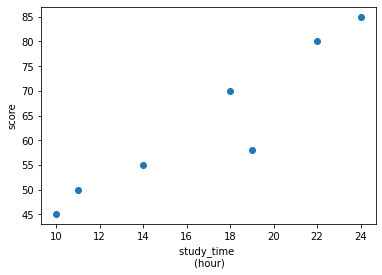

In [18]:
gr = plt.scatter(x_train, y_train)
plt.xlabel('study_time \n (hour)')
plt.ylabel('score')
plt.show()

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [11]:
import pathlib
path = pathlib.Path('/content/gdrive/MyDrive/ssafy/health_data.csv') 
data_file = pd.read_csv(path)
data_file.head()

,Unnamed: 0,height,weight
0,0,158.9,52.015
1,1,173.6,66.910
2,2,174.4,66.000
3,3,169.2,NaN
4,4,154.0,49.275


In [12]:
pd.isnull(data_file)

,Unnamed: 0,height,weight
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,True
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [21]:
data_file = data_file.dropna(axis=0).reset_index(drop=True)
data_file.head()

,Unnamed: 0,height,weight
0,0,158.9,52.015
1,1,173.6,66.910
2,2,174.4,66.000
3,4,154.0,49.275
4,5,177.7,69.820


In [22]:
height = torch.tensor(data_file.height)
weight = torch.tensor(data_file.weight)

In [24]:
# shape와 dimension 변경, type 은 float로
x_train=height.view([height.shape[0],1]).float()
y_train=weight.view([weight.shape[0],1]).float()

In [25]:
# 노이즈
x_train = torch.cat((torch.rand(50,1)*45+145,x_train), axis = 0)
y_train = torch.cat((torch.rand(50,1)*40+45,y_train), axis = 0)

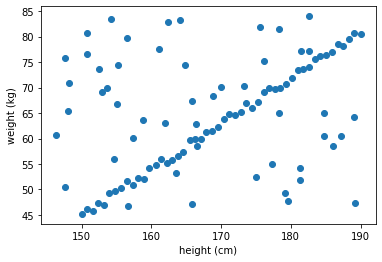

In [26]:
x = x_train
y = y_train

plt.scatter(x, y)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()

In [27]:
#답안 작성

#문제를 푸는데 필요한 변수들이며 필요할 경우 추가 혹은 삭제하셔도 무방합니다.
iter = 50000 #loss값을 구하는 횟수로 총 50000번 
weight_max = 100 #'[입력범위]'로 random값의 weight 범위 제한 목적 ( -50 < weight < 50 )
bias_max = 150 #오프셋으로 random값의 bias 범위 제한 목적 (-150 < bias < 0)
min_loss = 1000000 #업데이트 된 가장 작은 값의 loss 저장 
min_W = 0 
min_b = 0

#dataset
x = x_train
y = y_train

def loss_fn(hypo, GT):
  return sum(abs(hypo - GT))

# [Do it yourself] 위의 변수들을 활용하여 문제를 풀어주세요.
for i in range(iter):
  W = (torch.rand(1)-0.5) * weight_max # [-50,50]
  b = (-torch.rand(1)) * bias_max # [-150 , 0]
  hypothesis = x * W + b

  cur_loss = loss_fn(hypothesis, y)
  
  if cur_loss < min_loss:
    min_loss = cur_loss
    min_W = W
    min_b = b

  print("iteration : ",i)
  print("min_loss : " , min_loss)
  print("min_W : " ,min_W,"min_b : " ,min_b)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
min_loss :  tensor([816.7446])
min_W :  tensor([0.7858]) min_b :  tensor([-70.1125])
iteration :  48334
min_loss :  tensor([816.7446])
min_W :  tensor([0.7858]) min_b :  tensor([-70.1125])
iteration :  48335
min_loss :  tensor([816.7446])
min_W :  tensor([0.7858]) min_b :  tensor([-70.1125])
iteration :  48336
min_loss :  tensor([816.7446])
min_W :  tensor([0.7858]) min_b :  tensor([-70.1125])
iteration :  48337
min_loss :  tensor([816.7446])
min_W :  tensor([0.7858]) min_b :  tensor([-70.1125])
iteration :  48338
min_loss :  tensor([816.7446])
min_W :  tensor([0.7858]) min_b :  tensor([-70.1125])
iteration :  48339
min_loss :  tensor([816.7446])
min_W :  tensor([0.7858]) min_b :  tensor([-70.1125])
iteration :  48340
min_loss :  tensor([816.7446])
min_W :  tensor([0.7858]) min_b :  tensor([-70.1125])
iteration :  48341
min_loss :  tensor([816.7446])
min_W :  tensor([0.7858]) min_b :  tensor([-70.1125])
iteration :  48342
min_loss :  tensor([816.7446

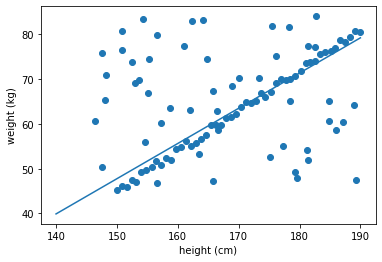

In [28]:
x = x_train
y = y_train

plt.scatter(x, y)

t = np.arange(140.,190.,0.001)

plt.plot(t, min_W*t+min_b)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()